[Reference](https://vleonard-01.medium.com/capstone-project-regression-analysis-for-housing-price-prediction-using-python-68a083f21e84)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Load dataset asdasd
url = "https://raw.githubusercontent.com/sirjvp/housesales/main/kc_house_data.csv"
data = pd.read_csv(url, delimiter=",")

dataset = data[['floors', 'condition', 'grade', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'bathrooms',
                'sqft_above' ,'bedrooms', 'price']]
dataset

,floors,condition,grade,sqft_basement,sqft_living15,sqft_lot15,bathrooms,sqft_above,bedrooms,price
0,1.0,3,7,0,1340,5650,1.00,1180,3,221900.0
1,2.0,3,7,400,1690,7639,2.25,2170,3,538000.0
2,1.0,3,6,0,2720,8062,1.00,770,2,180000.0
3,1.0,5,7,910,1360,5000,3.00,1050,4,604000.0
4,1.0,3,8,0,1800,7503,2.00,1680,3,510000.0
...,...,...,...,...,...,...,...,...,...,...
21608,3.0,3,8,0,1530,1509,2.50,1530,3,360000.0
21609,2.0,3,8,0,1830,7200,2.50,2310,4,400000.0
21610,2.0,3,7,0,1020,2007,0.75,1020,2,402101.0
21611,2.0,3,8,0,1410,1287,2.50,1600,3,400000.0


In [3]:
# Exploratory Data Analysis (Univariate) dengan statistik deskriptif
dataset["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

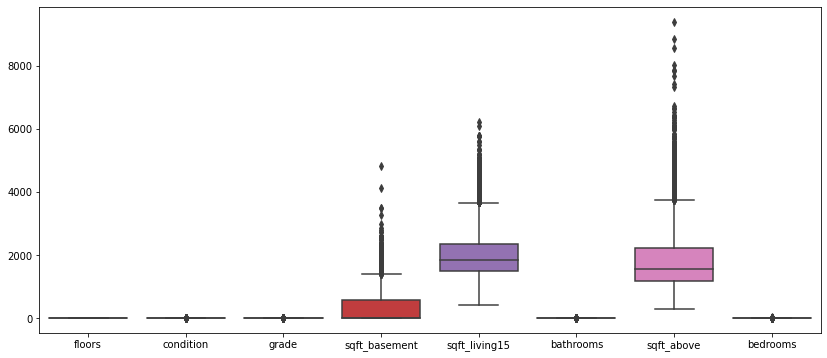

In [4]:
# boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=dataset[['floors', 'condition', 'grade', 'sqft_basement', 'sqft_living15', 'bathrooms', 'sqft_above' , 'bedrooms']])

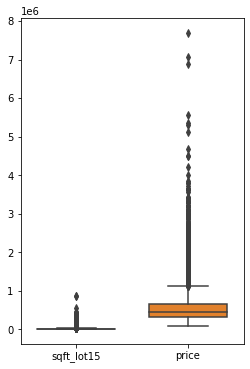

In [5]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=dataset[['sqft_lot15','price']], width=0.7)

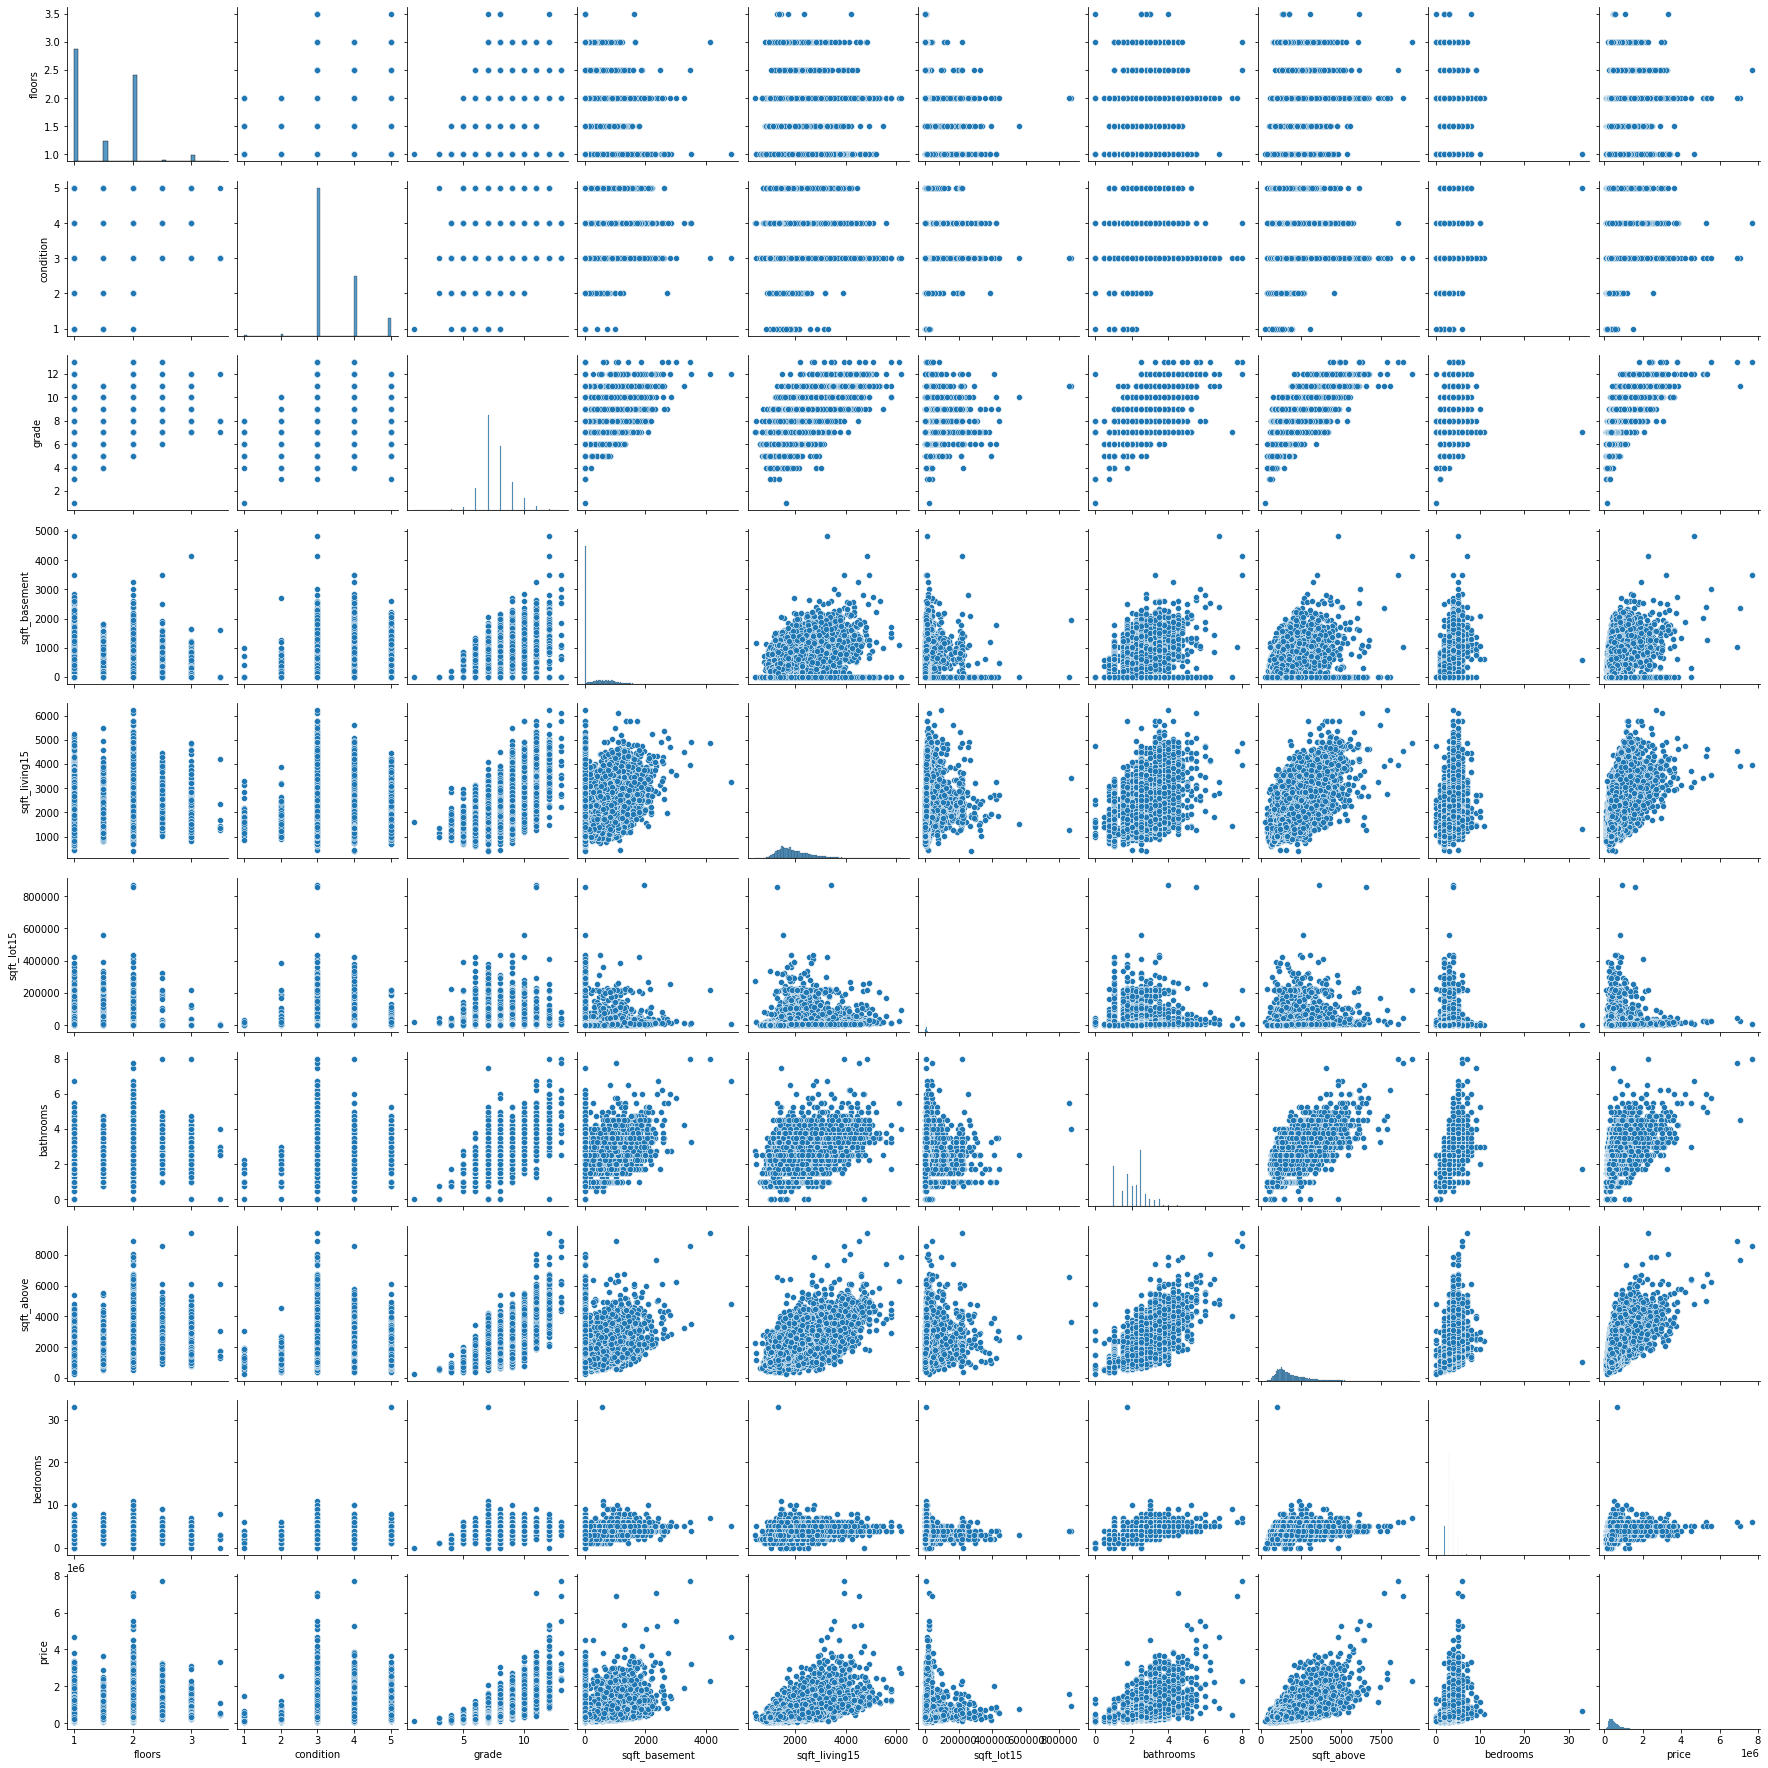

In [6]:
# Exploratory Data Analysis (Multivariate) dengan pairplot
sns.pairplot(dataset)
plt.show()

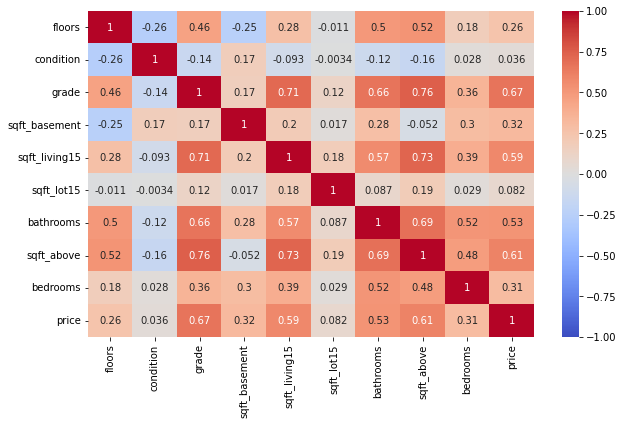

In [7]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

In [8]:
# Assign Independent and Dependent Variables

X = dataset.iloc[:, :-1].values

y = dataset.iloc[:, -1].values

In [9]:
# Split dataset into data Training and data Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
# Create regression equation from all data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# House price prediction
print(regressor.predict([[2, 3, 7, 0, 2500, 5000, 2, 1000, 3]]))

[259624.7678071]


In [12]:
# Model Summary based on data training
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     2330.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:22:36   Log-Likelihood:            -2.2400e+05
No. Observations:               16209   AIC:                         4.480e+05
Df Residuals:                   16199   BIC:                         4.481e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.338e+05   2.09e+04    -35.027      0.0

In [13]:
# Test the prediction results with test data
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), 
                        columns=["Prediction", "Test"])
# evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,Prediction,Test
0,3.774434e+05,297000.0
1,1.501986e+06,1578000.0
2,3.997187e+05,562100.0
3,4.860506e+05,631500.0
4,8.275579e+05,780000.0


In [14]:
# Evaluating Goodness of Fit using RMSE
from sklearn.metrics import mean_squared_error

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  58679242720.283745
Root Mean Squared Error (RMSE):  242237.98777294147


In [15]:
# MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print(mape)

32.60577984497478
